In [153]:
%load_ext line_profiler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

import networkx as nx
%matplotlib inline

# Sites

### All SF attractions (thus far)

fake data

### SF node costs: Fake Data

In [2]:
V = 300 # number of nodes

#### Visit Lengths: visit_lengths

In [122]:
# number of hours needed for visit
visit_lengths = 60*np.random.randint(1,5, size=V)

#### Ticket Prices: ticket_prices

In [123]:
# price for visiting
ticket_prices = np.random.randint(0, 50, size = V)

In [124]:
## later
# open_hours
# events_as_site

#### Site Styles: site_styles

In [125]:
travel_style = ['art', 'history', 'culture' ,'food', 'outdoors', 'adventure']

In [126]:
site_styles = np.random.randint(1,10, size=(V,len(travel_style)))

### SF arc costs -- randomly generated

In [127]:
# Open questions: how would I account for time differences in traveling via bus v. Uber?

#### time per travel leg: travel_times

In [128]:
# V=150 # number of nodes
D = 2 # inherent arc constraints: use this (for now) as a proxy of time needed between 2 graphs

#positions = np.random.rand(V, D)
positions = np.random.randint(2,240, size=(V, D))
differences = positions[:, None, :] - positions[None, :, :]
arc_costs = np.sqrt(np.sum(differences**2, axis=-1))# number of nodes
D = 2 # inherent arc constraints: use this (for now) as a proxy of time needed between 2 graphs

#positions = np.random.rand(V, D)
positions = np.random.randint(2,300, size=(V, D))
differences = positions[:, None, :] - positions[None, :, :]
arc_costs = np.sqrt(np.sum(differences**2, axis=-1))

In [129]:
SF_site_graph = nx.from_numpy_matrix(arc_costs, create_using=nx.DiGraph())

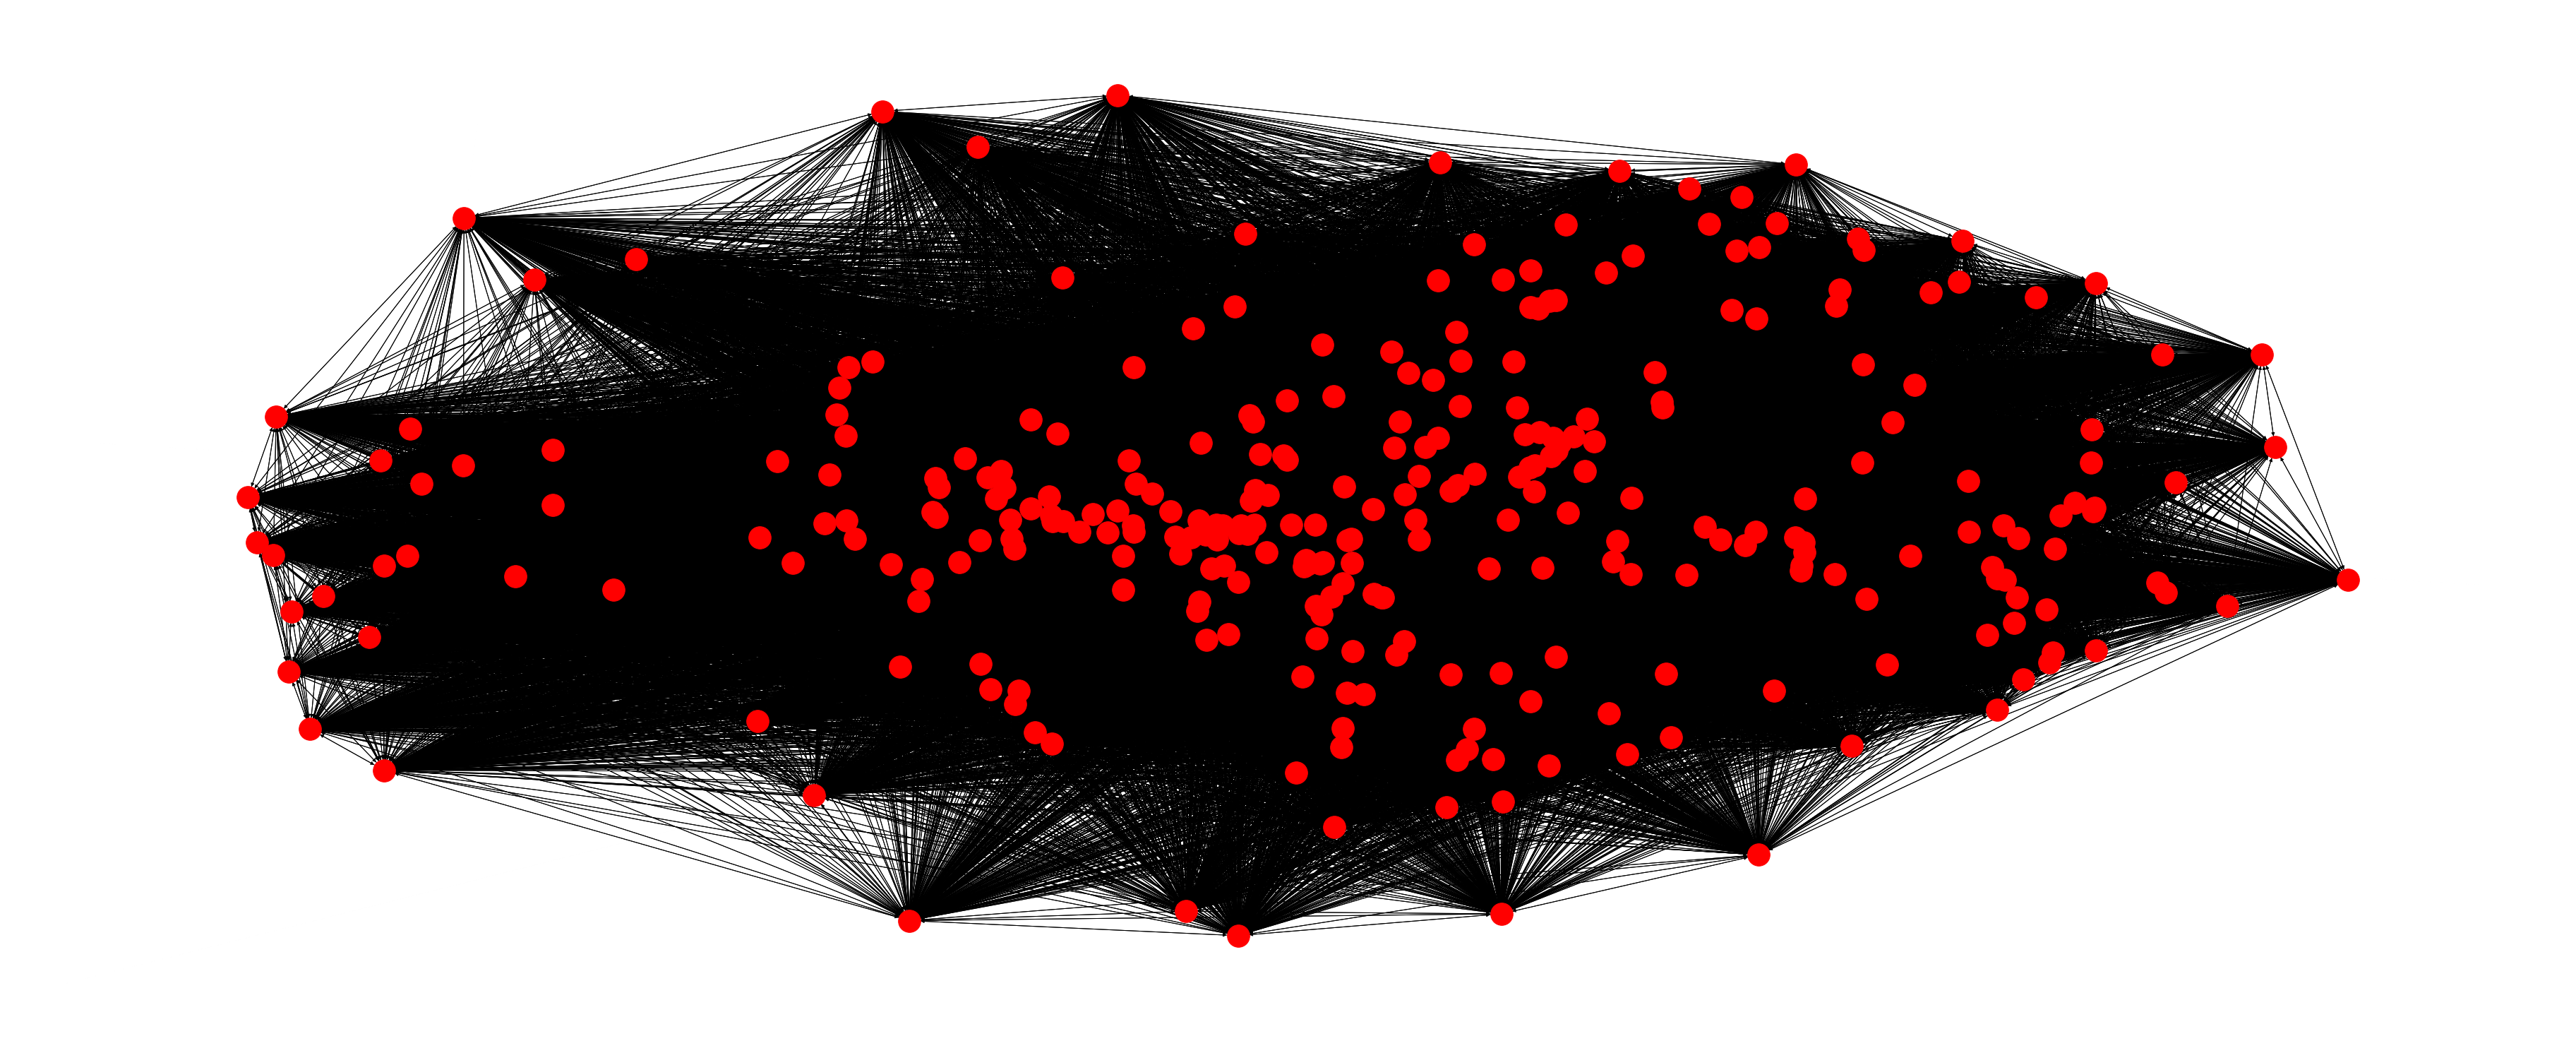

In [130]:
plt.figure(figsize=(50,20))
nx.draw(SF_site_graph, node_size=1000)
plt.show()

In [131]:
travel_times = nx.to_numpy_matrix(SF_site_graph)

#### cost per travel leg: travel_costs

In [132]:
# V = 150 # number of nodes
# D = 2 # inherent arc constraints: use this (for now) as a proxy of cost needed between 2 graphs

#positions = np.random.rand(V, D)
costs = np.random.randint(0,15, size=(V, D))
distances = costs[:, None, :] - costs[None, :, :]
travel_costs = np.sqrt(np.sum(distances**2, axis=-1))

# Users

site preference

### User Profiles: Toy Recommender Generated Data

In [133]:
### 20 users
num_users = 20

#### NO NEED TO USE: Travel Style: style_df

In [134]:
# same as site style -> travel_style = ['art', 'history', 'culture' ,'food', 'outdoors', 'adventure']

In [135]:
style_dict={}
for i in range(num_users):
    style_dict[f'user{i}'] = np.random.randint(1,10, len(travel_style))

In [136]:
style_df = pd.DataFrame(style_dict).T
style_df.head()

,0,1,2,3,4,5
user0,7,4,5,9,9,1
user1,2,4,8,3,7,1
user2,2,2,4,3,2,8
user3,7,6,1,5,9,2
user4,5,2,9,4,1,3


#### BETWEEN 0 AND 5: Site Preferences: preference_df

In [137]:
preference_dict={}
for i in range(num_users):
    preference_dict[f'user{i}'] = np.random.uniform(0,5, V)

In [138]:
preference_df = pd.DataFrame(preference_dict).T
preference_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
user0,3.184823,1.554656,0.851610,4.980575,1.647906,2.640020,0.155008,1.529226,1.023489,3.651866,...,2.551368,3.087891,4.735035,1.505987,2.579228,4.656478,1.133368,1.989853,0.050059,0.959731
user1,1.223125,4.132745,4.982305,4.607388,1.960699,3.989485,2.398418,0.396062,0.611006,4.284791,...,4.956800,3.808711,4.534189,0.089004,1.434020,2.758383,2.902989,3.099949,3.461589,0.536406
user2,0.174056,2.570350,4.175906,2.612968,3.529465,3.960783,3.882596,1.189560,1.376461,0.429339,...,0.442606,1.208847,1.971568,0.001003,4.151133,0.314330,4.597203,3.900240,0.184865,0.833983
user3,4.270544,0.724509,0.583254,3.258153,0.601614,1.327557,2.879543,4.638445,1.562820,3.361609,...,1.512944,2.181538,3.006344,3.181935,0.027190,3.215390,3.571934,2.204626,4.701349,3.727056
user4,2.518271,4.929997,4.257157,2.272930,1.977121,3.352547,4.251455,2.892671,2.994722,2.262554,...,2.440071,2.462315,2.618298,0.889335,0.843095,3.244018,0.532831,1.500827,2.310644,1.263738


#### Budget: user_budget

In [139]:
user_budget = np.random.choice(range(2001), size=len(style_dict))

In [140]:
user_budget_df = dict(zip(preference_df.index, user_budget))

# Site and User Joined

#### Highlight Bonus: highlight_bonus

In [141]:
# The highlight reel is the "must-see" sites of SF ranked 
# -by number of reviews (must be within top 10 by reviews)
# -visit duration longer than 
# -must share at least 

In [142]:
highlight_reel = np.random.randint(0,V,10)

In [143]:
highlight_bonuses = np.ones(V)

In [144]:
for highlight in highlight_reel:
    highlight_bonuses[highlight] = 1.25

# Models

### Constraints

#### Tour Times: tour_hours

In [145]:
tour_hours = 60*np.array(range(9, 21))

#### Max Travel Times/ Site to Travel Ratio: site_travel_ratio

In [27]:
# set the max time the party should be traveling between sites to a ratio of hours 
max_travel_time = 3

# OR set the minimum ratio between time at attractions to travel to site to a value
site_travel_ratio = 2

#### User Budget: budget

In [28]:
# budget
# budget = user_budget[user]
#budget = user_budget

#### Already Seen Sites: already_seen

In [29]:
# sites that the visitor has already visited and does NOT want to see again
already_seen = np.random.randint(0,V, 3)

#### Need to See Sites: want_to_see

In [30]:
# sites that the visitor absolutely wants to see
potentials = list(set(range(V)).difference(set(already_seen)))
want_to_see = np.random.choice(potentials, 2, replace=False)

#### "Cost Function": score

The cost function is some sort of connection between user enjoyment (derived from rankings & preferences) and opportunity cost of not going to other sites???.

In [31]:
#trial 1

In [32]:
#### weight = (highlight_bonus*similarity(site_style, user_style)*(visit_length_minutes/ticket_price) - travel_time*travel_cost  

In [33]:
#### greedy algorithms: take things with high score/ cost; high score/ time and put cut-off

#### scheduling algorithms: heuristics 

In [34]:
# similarity = preferences_df[user][site]

# beta_1=1
# beta_2=2

# travel_time = travel_times[site1][site2]

# # cost = travel_costs[site1][site2]

In [35]:
score = highlight_bonus*similarity*visit_length - beta_1*travel_time - beta_2*travel_cost

NameError: name 'highlight_bonus' is not defined

### Pre-Work

#### 2. NOT CURRENTLY USED: Prune graph

In [36]:
travel_times[travel_times<120]

matrix([[ 0.        , 89.1571646 , 88.95504483, ..., 73.24616031,
         64.51356447,  0.        ]])

#### 3. Define site clusters

In [37]:
# Other methods to try:
# k-Spanning Tree
# Shared Nearest Neighbor Clustering
# Betweenness Centrality Based
# Highly Connected Components
# Maximal Clique Enumeration
# Kernel k-means

### Final Data Inputs to Model

#### User Data: budget, travel_time

In [147]:
user = np.random.choice(list(preference_df.index))

In [148]:
budget = user_budget_df[user]

In [149]:
tour_length = (max(tour_hours) - min(tour_hours))

#### User-to-Sites Data: potential_sites--list of (id, similarity, highlight_bonus, visit_length, ticket_price, site_style)

In [150]:
similarities = preference_df.loc[user]

In [151]:
All_SF_sites = dict(zip(range(V), list(zip(similarities, highlight_bonuses, visit_lengths, ticket_prices, site_styles))))

In [152]:
SF_sites = {key: value for (key, value) in All_SF_sites.items() if value[0] >= 3}
SF_sites[4]

(4.717960527424218, 1.0, 60, 6, array([1, 6, 7, 9, 1, 7]))

#### Path Data: travel_matrix

In [44]:
travel_times_df = pd.DataFrame(travel_times)[list(SF_sites.keys())].iloc[list(SF_sites.keys())]
travel_costs_df = pd.DataFrame(travel_costs)[list(SF_sites.keys())].iloc[list(SF_sites.keys())]

In [45]:
travel_matrix = [travel_times_df, travel_costs_df]

### Route-Finding

In [46]:
# similar experiences, different experiences, downweight things that are close in terms of experience 

#### SCORE 

In [ ]:
def get_score(potential_sites, attraction_id, current, highlight_bonuses, visit_lengths, travel_times_df, travel_costs_df, B1=1, B2=1):
    score = potential_sites[attraction_id]*highlight_bonuses[attraction_id]*visit_lengths[attraction_id] - B1*travel_times_df[current][attraction_id] - B2*travel_costs_df[current][attraction_id]
    return score

#### 1. Greedy-greedy MSTs

In [ ]:
discrete_budget = np.linspace(25,2000, 399)

In [ ]:
budget_matrix = [0]*len(discrete_budget)

In [ ]:
# Budget optimization

def get_budget_optimized(budget_matrix, budget_limit, site_to_check):
    
    k_0 = budget_matrix[-1]
    k_1 = []
    
    for budget_amount in range(len(budget_matrix)):
        if site_to_check > budget_amount:
            k_1.append(k_0[budget_matrix.index])
        elif new_item['weight'][0] == budget_amount:
            value = max(k_0[weight], new_item['value'][0])
            k_1.append(value)
        elif new_item['weight'][0] < budget_amount:
            leftover_weight = weight - new_item['weight'][0]
            potential_value = k_0[leftover_weight] + new_item['value'][0]
            value = max(k_0[weight], potential_value)
            k_1.append(value)
            
    weight_val.append(k_1)
    
    return weight_val

In [ ]:
budget_matrix = [0]*len(discrete_budget)

In [ ]:
def get_comparison_matrix(weight_val, weight_limit, new_item):
    
    k_0 = weight_val[-1]
    k_1 = []
    
    for weight in range(len(k_0)):
        if new_item['weight'][0] > weight:
            k_1.append(k_0[weight])
        elif new_item['weight'][0] == weight:
            value = max(k_0[weight], new_item['value'][0])
            k_1.append(value)
        elif new_item['weight'][0] < weight:
            leftover_weight = weight - new_item['weight'][0]
            potential_value = k_0[leftover_weight] + new_item['value'][0]
            value = max(k_0[weight], potential_value)
            k_1.append(value)
            
    weight_val.append(k_1)
    
    return weight_val

#### 2. Genetic Algorithm with Variable-Length Chromosomes

Utilize elitism and roulette wheel 

In [47]:
### think about whether there is a better way to set this up

In [48]:
class Path:
    def __init__(self, from_attraction, to_attraction, similarity, highlight_bonus, visit_length, visit_cost):
       
        self.similarity = similarity
        self.highlight_bonus = highlight_bonus
        self.visit_length = visit_length
        self.visit_cost = visit_cost

        self.to_attraction = to_attraction
        self.from_attraction = from_attraction
        self.name = "(" + str(self.from_attraction) + "->" + str(self.to_attraction) + ")"
        
    def travel_time(self, travel_times_df):
        travel_time = travel_times_df[self.from_attraction][self.to_attraction]
        return travel_time
        
    def travel_cost(self, travel_costs_df):
        travel_cost = travel_costs_df[self.from_attraction][self.to_attraction]
        return travel_cost
    
    def score(self, travel_times_df, B1=1, B2=2):
        score = self.highlight_bonus*self.similarity*self.visit_length - self.travel_time(travel_times_df) - self.travel_cost(travel_costs_df)
        return score
    
    def __repr__(self):
        return self.name

In [49]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0
        
    def route_fitness(self):
        if self.fitness == 0:
            path_fitness = 0
            for i in range(len(self.route)-1):
                from_attraction = self.route[i]
                to_attraction = self.route[i+1]
                path = Path(from_attraction, to_attraction, SF_sites[to_attraction][0], SF_sites[to_attraction][1], SF_sites[to_attraction][2], SF_sites[to_attraction][3])
                path_fitness += path.score(travel_times_df)
        self.fitness = path_fitness
        return self.fitness

In [81]:
def get_start_and_end(SF_sites):
    #sites = list(SF_sites.keys())
    #start = np.random.choice(sites)
    start = 274
    stop = start
    return start, stop

In [103]:
def create_route(start, stop, budget, tour_length, SF_sites, travel_matrix):
    sites = list(SF_sites.keys())
    path = [start]
    not_valid = []
    o_budget = budget
    o_tour_length = tour_length
    
    while ((budget > 0.1*o_budget) | (tour_length > 0.1*o_tour_length)) & ((budget > 0) & (tour_length > 0)):
        
        if len(path) == 1:
            from_attraction = start
            
        possibilities = list(set(sites).difference(set(path + not_valid + [stop])))
        
        '''if there aren't any options left, break'''
        if len(possibilities) == 0:
                break
        to_attraction = np.random.choice(possibilities)
        
        '''budget - ticket_prices - cost of traveling from location A to location B'''
        budget = budget - SF_sites[to_attraction][3] - travel_matrix[1][from_attraction][to_attraction]
        
        '''tour_length - visit_length - time to travel from location A to location B'''
        tour_length = tour_length - SF_sites[to_attraction][2] - travel_matrix[0][from_attraction][to_attraction]
        
        '''check that there is enough budget/time left to get to get to the stop location'''
        if (budget > travel_matrix[1][to_attraction][stop]) & (tour_length > travel_matrix[0][to_attraction][stop]):
            path.append(to_attraction)
            from_attraction = to_attraction
            
        else:
            '''if not, go back to the drawing board, and add the current site to the discard pile'''
            not_valid.append(to_attraction)
            '''add the budget and time back'''
            budget = budget + SF_sites[to_attraction][3] + travel_matrix[1][from_attraction][to_attraction]
            tour_length = tour_length + SF_sites[to_attraction][2] + travel_matrix[0][from_attraction][to_attraction]
            
    path.append(stop)

    available_budget = budget - travel_matrix[1][path[-1]][stop]
    available_tour_length = tour_length - travel_matrix[0][path[-1]][stop]
    return path, [available_budget, available_tour_length]

In [91]:
def create_generation(gen_size, budget, tour_length, SF_sites, travel_matrix):
    generation = []
    start, stop = get_start_and_end(SF_sites)
    i=0
    
    while i < gen_size:
        path = create_route(start, stop, budget, tour_length, SF_sites, travel_matrix)
        if (path[0] not in [route[0] for route in generation]) & (len(path[0]) > 2):
            generation.append(path)
            i+=1
    return generation

In [84]:
gen = create_generation(20, budget, tour_length, SF_sites, travel_matrix)

In [85]:
def rank_routes(generation):
    fitness_results = {}
    for i in range(len(generation)):
        fitness_results[i] = Fitness(generation[i][0]).route_fitness()
    ranked_gen = sorted(fitness_results.items(), key = lambda x: x[1], reverse = True)
    return ranked_gen

In [86]:
ranked = rank_routes(gen)

In [87]:
def select_parents(ranked_gen, elite_size):
    selection_results = []
    df = pd.DataFrame(np.array(ranked_gen), columns = ['id', 'fitness'])
    df['cum_fitness'] = df.fitness.cumsum()
    df['cum_perc'] = 100*df.cum_fitness/df.fitness.sum()       
    
    for i in range(elite_size):
        selection_results.append(ranked_gen[i])
        
    for j in range((len(ranked_gen) - elite_size)):
        pick = np.random.randint(0,101)
        if pick >= df.iat[j,3]:
            candidate = ranked_gen[j]
            selection_results.append(candidate)
      
    return selection_results

In [57]:
#select_parents allows duplicates

In [58]:
def get_mating_pool(generation, selection_results):
    mating_pool =[]
    for i in range(len(selection_results)):
        index = selection_results[i][0]
        mating_pool.append(generation[index])
    return mating_pool

##### STRATEGY: SVLC fitness

one point swapping 

In [70]:
def create_children(parent1, parent2):
    chromosome1 = parent1[0]
    chromosome2 = parent2[0]
    
    start = chromosome1[0]
    stop = chromosome1[-1]
    swap_sites = list(set([start, stop]))
    children = []
    trials = 0
    
    '''get the intersection points shared by the parents'''
    ptl_swap_sites = list(set(chromosome1).intersection(set(chromosome2)))
        
    while (trials <= 10):
        
        if (len(children) >= 2):
            break
        
        '''if the two chromosomes selected are the same, shuffle randomly 2x'''
        if (chromosome1 == chromosome2): 
            in_between = np.random.choice(chromosome1[1:-1], np.random.randint(1, len(chromosome1[1:-1]))).tolist()
            child1 = chromosome1[:1] + in_between + chromosome1[-1:]

            in_between = np.random.choice(chromosome1[1:-1], np.random.randint(1, len(chromosome1[1:-1]))).tolist()
            child2 = chromosome2[:1] + in_between + chromosome2[-1:]

        elif ((start == stop) & (len(ptl_swap_sites) == 1)) | ((start != stop) & (len(ptl_swap_sites) == 2)):
            '''if only the start and stop points are shared by the parents, then swap randomly!!!!'''
            if len(chromosome1) <= len(chromosome2):
                shorter = chromosome1
            else:
                shorter = chromosome2

            swap_sites_indices = sorted(np.random.choice(range(1,len(shorter)-1), 2, replace=False))
            swap_sites_indices = swap_sites_indices+[1]*len(swap_sites_indices)

            '''the first child is parent1 up to the first swap index, then parent2 up to the second swap index, then parent1 to the end'''
            child1 = chromosome1[:swap_sites_indices[0]]+chromosome2[swap_sites_indices[0]:swap_sites_indices[1]]+chromosome1[swap_sites_indices[1]:]
            '''the second child is the inverse'''
            child2 = chromosome2[:swap_sites_indices[0]]+chromosome1[swap_sites_indices[0]:swap_sites_indices[1]]+chromosome2[swap_sites_indices[1]:]

        else:
            '''if more than start and stop are shared, ensure that the swap sites chosen are not both the start and stop'''
            swap_sites = np.random.choice(ptl_swap_sites, 2, replace=False)

            if (start != stop):
                while (start in swap_sites) & (stop in swap_sites):
                    swap_sites = np.random.choice(ptl_swap_sites, 2, replace=False)

            p1_swap_site_indices = sorted([chromosome1.index(swap_sites[0]), chromosome1.index(swap_sites[1])])
            p2_swap_site_indices = sorted([chromosome2.index(swap_sites[0]), chromosome2.index(swap_sites[1])])

            '''create childen'''
            child1 = chromosome1[:p1_swap_site_indices[0]] + chromosome2[p2_swap_site_indices[0]:p2_swap_site_indices[1]] + chromosome1[p1_swap_site_indices[1]:]
            child2 = chromosome2[:p2_swap_site_indices[0]] + chromosome1[p1_swap_site_indices[0]:p1_swap_site_indices[1]] + chromosome2[p2_swap_site_indices[1]:] 

            '''ensure that there are no duplicated entries'''
            child1 = remove_duplicates(child1, start, stop)
            child2 = remove_duplicates(child2, start, stop)

        '''check the viability of the children -- if they do not meet survival requirements, we will try again'''
        for child in [child1, child2]:
            child = tag_survival(child, budget, tour_length, SF_sites, travel_matrix)
            if (len(child) > 0) & (child not in children) & ((child != parent1) & (child != parent2)):
                children.append(child)
                
        trials +=1
        
    return children
    

In [71]:
def remove_duplicates(child, start, stop):
    indices = {site:[i for (i,x) in enumerate(child) if x == site] for site in child}
    indices_to_remove =[]
    for key, value in indices.items():
        while len(value) > 1:
            if ((key == start) | (key == stop)):
                if (start == stop):
                    value.pop(0)
                    value.pop()
                elif (key == start):
                    value.pop(0)
                    indices_to_remove.append(value)
                elif (key == stop):
                    value.pop(-1)
                    indices_to_remove.append(value)
            else:    
                index_to_remove = np.random.choice(value)
                indices_to_remove.append(index_to_remove)
                value.remove(index_to_remove)
    
    new_child = [child[index] for index in range(len(child)) if index not in indices_to_remove]
    
    return new_child

In [104]:
def tag_survival(child, budget, tour_length, SF_sites, travel_matrix):
    o_budget = budget
    o_tour_length = tour_length
    
    for index in range(len(child)-1):
        '''budget - ticket_prices - cost of traveling from location A to location B'''
        budget = budget - SF_sites[child[index+1]][3] - travel_matrix[1][child[index]][child[index+1]]

        '''tour_length - visit_length - time to travel from location A to location B'''
        tour_length = tour_length - SF_sites[child[index+1]][2] - travel_matrix[0][child[index]][child[index+1]]

        available_budget = budget
        available_tour_length = tour_length
    
    if  ((budget <= 0.1*o_budget) | (tour_length <= 0.1*o_tour_length)) & ((available_budget > 0) & (available_tour_length > 0)):
        return child, [available_budget, available_tour_length]
    else:
        return ''


In [73]:
# def get_mutation(child, mutation_rate):
#     for attraction_index in range(len(child[1:-1])):
#         if (np.random.random() < mutation_rate):
#             switch_index = np.random.choice(list(set(range(len(child[1:-1]))).difference(set([attraction_index]))))
#             attraction = child[1+attraction_index]
#             switch_site = child[1+switch_index]
            
#             child[1+attraction_index] = switch_site
#             child[1+switch_index] = attraction
#     return child       

In [74]:
def add_mutations(next_generation, mutation_rate):
    next_generation_1 = deepcopy(next_generation)
    mutations = []
    
    for child in next_generation_1:
        child_0 = child[0]
        for attraction_index in range(len(child[0][1:-1])):
            options = list(set(range(len(child_0[1:-1]))).difference(set([attraction_index])))
            if (np.random.random() < mutation_rate) & (len(options) > 0):
                switch_index = np.random.choice(options)
                attraction = child_0[1+attraction_index]
                switch_site = child_0[1+switch_index]

                child_0[1+attraction_index] = switch_site
                child_0[1+switch_index] = attraction

                child_0 = tag_survival(child_0, budget, tour_length, SF_sites, travel_matrix)
                
                if (len(child_0) > 0):
                    mutations.append(child)
    return mutations

In [75]:
def get_next_generation(mating_pool, elite_size, budget, tour_length, SF_sites, travel_matrix):
    
    next_generation = []
    
    '''keep the top_n from the previous generation'''
    for i in range(elite_size):
        next_generation.append(mating_pool[i])

    '''create more children for the next generation with combinations from the mating_pool'''
    for i in range((len(mating_pool)-elite_size)):
        parents_indices = np.random.choice(range(len(mating_pool)), 2, replace=False)
        parent1 = mating_pool[parents_indices[0]]
        parent2 = mating_pool[parents_indices[1]]
        
        children = create_children(parent1, parent2)
        next_generation.extend(children)

    return next_generation

In [76]:
def propagate_generations(current_generation, budget, tour_length, SF_sites, travel_matrix, elite_size, mutation_rate=0.1):
    '''rank the routes from the current generation'''
    ranked_gen = rank_routes(current_generation)
    selection_results = select_parents(ranked_gen, elite_size)
    mating_pool = get_mating_pool(current_generation, selection_results)
    next_generation = get_next_generation(mating_pool, elite_size, budget, tour_length, SF_sites, travel_matrix)
    mutations = add_mutations(next_generation, mutation_rate)
    if (len(mutations) > 0):
        final_next_generation = next_generation + mutations
    else:
        final_next_generation = next_generation
    return final_next_generation

In [116]:
def genetic_algorithm_plot(gen_size, budget, tour_length, SF_sites, travel_matrix, elite_size=15, mutation_rate=0.01, num_generations=6):
    np.random.seed(52)
    
    '''create an initial generation'''
    current_generation = create_generation(gen_size, budget, tour_length, SF_sites, travel_matrix)
    progress = []
    '''keep track of the best route from the initial generation'''
    
    initial_performance = rank_routes(current_generation)[0][1]
    progress.append(initial_performance)
    
    
    '''iterate num_generations times'''
    for i in range(0, num_generations):
        
        '''get next generation'''
        current_generation = propagate_generations(current_generation, budget, tour_length, SF_sites, travel_matrix, elite_size, mutation_rate)
        #print(i, rank_routes(current_generation)[0][1], current_generation[rank_routes(current_generation)[0][0]])
        '''keep track of the best route from the current generation'''
        progress.append(rank_routes(current_generation)[0][1])
    
    '''create the plot'''
    plt.plot(progress)
    plt.ylabel('Fitness Score')
    plt.xlabel('Generation')
    plt.show()
    
    final_performance = progress[-1]
    
    return initial_performance, final_performance

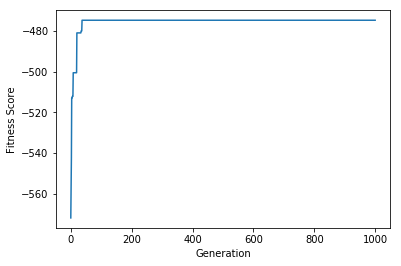

(-571.8147384301608, -474.81219767350035)

In [117]:
genetic_algorithm_plot(90, budget, tour_length, SF_sites, travel_matrix, elite_size=int(.2*100), mutation_rate=0.05, num_generations=1000)

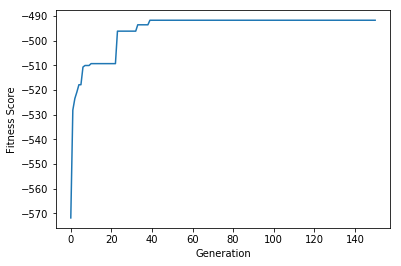

-491.75911284884046

In [106]:
genetic_algorithm_plot(70, budget, tour_length, SF_sites, travel_matrix, elite_size=int(.35*40), mutation_rate=0.08, num_generations=150)

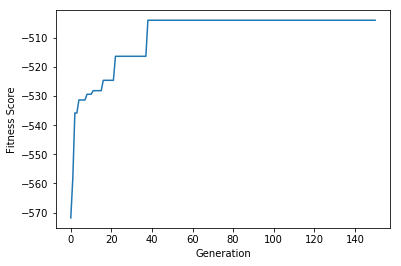

-504.0061554291526

In [107]:
genetic_algorithm_plot(40, budget, tour_length, SF_sites, travel_matrix, elite_size=int(.15*40), mutation_rate=0.08, num_generations=150)

In [ ]:
# def genetic_algorithm(gen_size, budget, tour_length, SF_sites, travel_matrix, elite_size, mutation_rate=0.01, num_generations=35):
#     current_generation = create_generation(gen_size, budget, tour_length, SF_sites, travel_matrix)
#     for i in range(num_generations):
#         current_generation = propagate_generations(current_generation, budget, tour_length, SF_sites, travel_matrix, elite_size=5, mutation_rate=0.01)
#         k = rank_routes(current_generation)
#     best_route_index = k[0][0]
#     best_route = current_generation[best_route_index]
#     return best_route

In [ ]:
def propagate_generations2(current_generation, budget, tour_length, SF_sites, travel_matrix, elite_size, mutation_rate=0.1):
    '''rank the routes from the current generation'''
    ranked_gen = rank_routes(current_generation)
    selection_results = select_parents(ranked_gen, elite_size)
    mating_pool = get_mating_pool(current_generation, selection_results)
    next_generation = get_next_generation(mating_pool, elite_size, budget, tour_length, SF_sites, travel_matrix)
    return next_generation

In [ ]:
def genetic_algorithm_plot2(gen_size, budget, tour_length, SF_sites, travel_matrix, elite_size=15, mutation_rate=0.01, num_generations=6):
    np.random.seed(53)
    
    '''create an initial generation'''
    current_generation = create_generation(gen_size, budget, tour_length, SF_sites, travel_matrix)
    
    progress = []
    '''keep track of the best route from the initial generation'''
    progress.append(rank_routes(current_generation)[0][1])
    
    
    '''iterate num_generations times'''
    for i in range(0, num_generations):
        
        '''get next generation'''
        current_generation = propagate_generations2(current_generation, budget, tour_length, SF_sites, travel_matrix, elite_size, mutation_rate)
        #print(i, rank_routes(current_generation)[0][1], current_generation[rank_routes(current_generation)[0][0]])
        '''keep track of the best route from the current generation'''
        progress.append(rank_routes(current_generation)[0][1])
    
    '''create the plot'''
    plt.plot(progress)
    plt.ylabel('Fitness Score')
    plt.xlabel('Generation')
    plt.show()
    
    return progress

In [ ]:
genetic_algorithm_plot2(100, budget, tour_length, SF_sites, travel_matrix, elite_size=int(.2*100), num_generations=200)